In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Study inspired from : https://github.com/thu-vu92/python-dashboard-panel

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

In [26]:
df.shape

(25989, 60)

In [27]:
df.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


# Data quality

## Duplicate

In [28]:
df = df[df.duplicated(subset=['country','year']) == False]

In [29]:
df.shape

(25989, 60)

## Missing values

In [30]:
import missingno as msno

<AxesSubplot:>

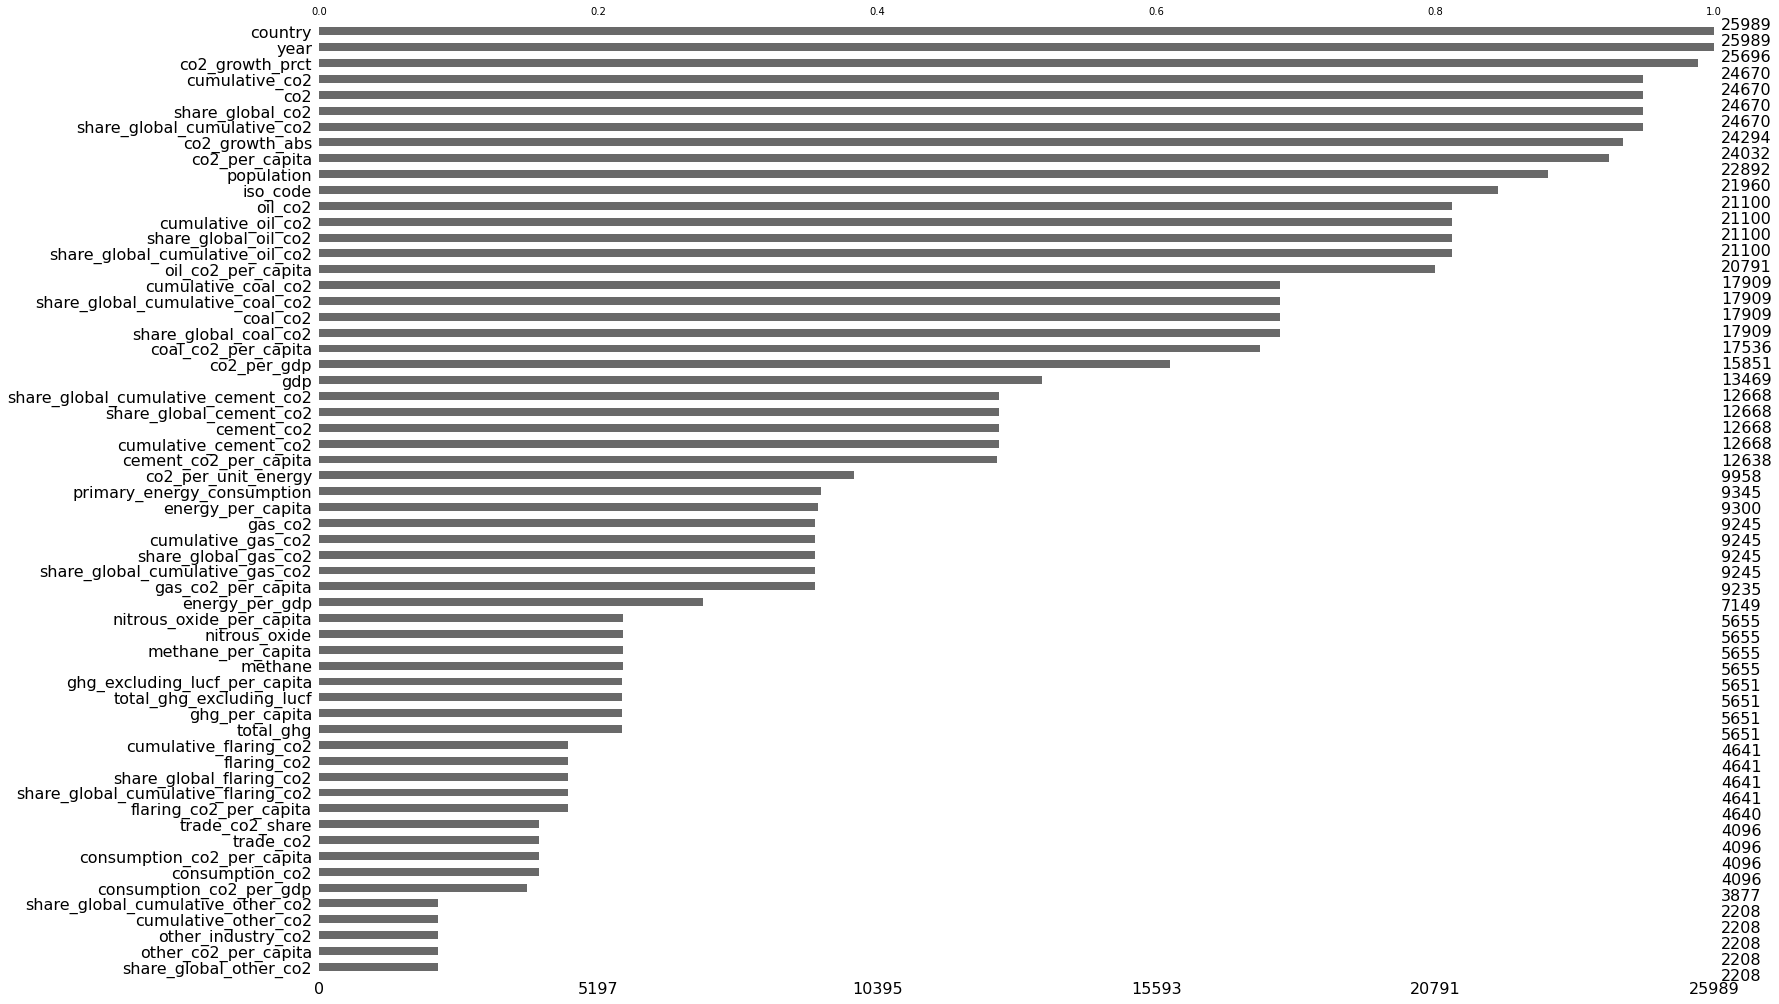

In [31]:
# doc: https://github.com/ResidentMario/missingno/blob/master/missingno/missingno.py
msno.bar(df, sort="ascending")

In [32]:
# Keep col with at least 75% values present
number_present = df.shape[0] * 0.75
df.dropna(axis='columns', thresh=number_present, inplace=True)

<AxesSubplot:>

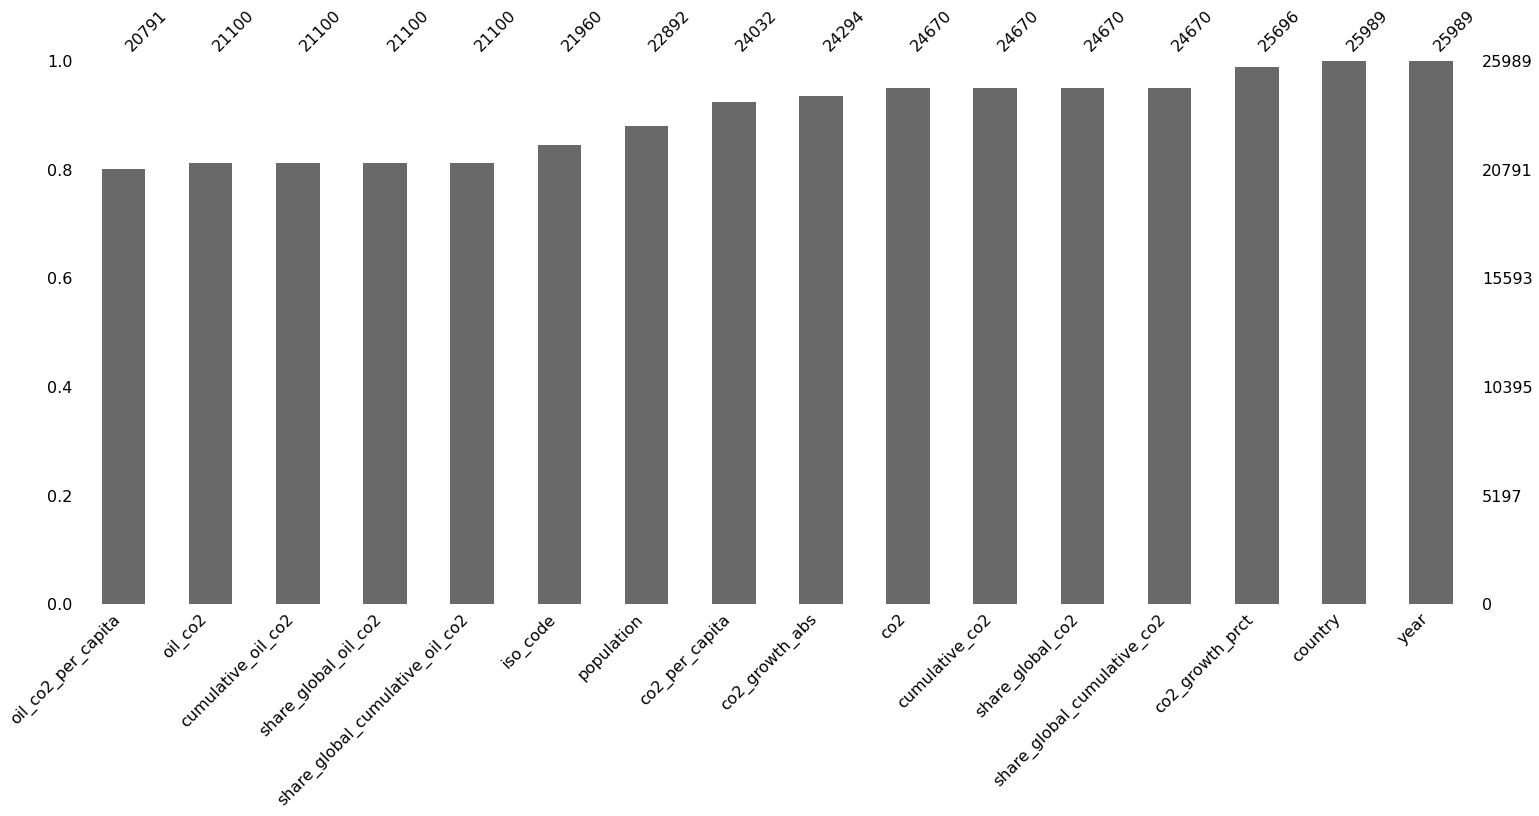

In [33]:
msno.bar(df, sort="ascending")

In [34]:
df.head()

,iso_code,country,year,co2,co2_per_capita,oil_co2,oil_co2_per_capita,co2_growth_prct,co2_growth_abs,cumulative_co2,cumulative_oil_co2,share_global_co2,share_global_oil_co2,share_global_cumulative_co2,share_global_cumulative_oil_co2,population
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,NaN,0.015,NaN,0.0,NaN,0.0,NaN,7624058.0
1,AFG,Afghanistan,1950,0.084,0.011,0.063,0.008,475.0,0.070,0.099,0.063,0.0,0.0,0.0,0.0,7752117.0
2,AFG,Afghanistan,1951,0.092,0.012,0.066,0.008,8.7,0.007,0.191,0.129,0.0,0.0,0.0,0.0,7840151.0
3,AFG,Afghanistan,1952,0.092,0.012,0.060,0.008,0.0,0.000,0.282,0.189,0.0,0.0,0.0,0.0,7935996.0
4,AFG,Afghanistan,1953,0.106,0.013,0.068,0.008,16.0,0.015,0.388,0.257,0.0,0.0,0.0,0.0,8039684.0


In [35]:
# Drop Iso_code because it has missing values and we wont need it.
df.drop("iso_code", axis=1, inplace=True)

In [36]:
# Impute missing values
from sklearn.impute import KNNImputer

In [37]:
imputer = KNNImputer(weights="distance")

In [38]:
df_to_impute = df.drop(["country","year"], axis=1)

In [39]:
imputed_df = imputer.fit_transform(df_to_impute)

In [40]:
imputed_df = pd.DataFrame(imputed_df, columns=df_to_impute.columns)

In [41]:
imputed_df.head()

,co2,co2_per_capita,oil_co2,oil_co2_per_capita,co2_growth_prct,co2_growth_abs,cumulative_co2,cumulative_oil_co2,share_global_co2,share_global_oil_co2,share_global_cumulative_co2,share_global_cumulative_oil_co2,population
0,0.015,0.002,0.0096,0.001,0.0,0.000,0.015,0.0198,0.0,0.0,0.0,0.0,7624058.0
1,0.084,0.011,0.0630,0.008,475.0,0.070,0.099,0.0630,0.0,0.0,0.0,0.0,7752117.0
2,0.092,0.012,0.0660,0.008,8.7,0.007,0.191,0.1290,0.0,0.0,0.0,0.0,7840151.0
3,0.092,0.012,0.0600,0.008,0.0,0.000,0.282,0.1890,0.0,0.0,0.0,0.0,7935996.0
4,0.106,0.013,0.0680,0.008,16.0,0.015,0.388,0.2570,0.0,0.0,0.0,0.0,8039684.0


In [45]:
df = pd.concat([df[["country","year"]], imputed_df], axis=1)

In [46]:
df.head()

,country,year,co2,co2_per_capita,oil_co2,oil_co2_per_capita,co2_growth_prct,co2_growth_abs,cumulative_co2,cumulative_oil_co2,share_global_co2,share_global_oil_co2,share_global_cumulative_co2,share_global_cumulative_oil_co2,population
0,Afghanistan,1949,0.015,0.002,0.0096,0.001,0.0,0.000,0.015,0.0198,0.0,0.0,0.0,0.0,7624058.0
1,Afghanistan,1950,0.084,0.011,0.0630,0.008,475.0,0.070,0.099,0.0630,0.0,0.0,0.0,0.0,7752117.0
2,Afghanistan,1951,0.092,0.012,0.0660,0.008,8.7,0.007,0.191,0.1290,0.0,0.0,0.0,0.0,7840151.0
3,Afghanistan,1952,0.092,0.012,0.0600,0.008,0.0,0.000,0.282,0.1890,0.0,0.0,0.0,0.0,7935996.0
4,Afghanistan,1953,0.106,0.013,0.0680,0.008,16.0,0.015,0.388,0.2570,0.0,0.0,0.0,0.0,8039684.0


# Exploration